# Enlaces de interés
- https://opendata-ajuntament.barcelona.cat/es/
- https://chat.deepseek.com/

## Datos de open data Barcelona:
- https://opendata-ajuntament.barcelona.cat/data/es/dataset/mapa-base-guia
- https://drive.google.com/drive/folders/1Ur9w40zYWJvo34eQ48IMbGKsHwKpSMWz?usp=sharing

# Estructura datasets y carga de los datos

Estructura dataset:

- Camp 	Descripció
- last_updated 	Timestamp de l'arxiu
- ttl 	TimeToLive de la resposta
- data 	Contenidor d'arrays d'informació d'estacions
- stations 	Array de dades de cada estació
- station_id 	Identificador de l'estació
- num_bikes_available 	Nombre de bicicletes disponibles
- num_bikes_available_types 	Array de tipus de bicicletes disponibles
- mechanical 	Nombre de bicicletes mecàniques disponibles
- ebike 	Nombre de bicicletes elèctriques disponibles
- num_docks_available 	Nombre de ancoratges disponibles
- is_installed 	L'estació està correctament instalada (0-NO,1-SI)
- is_renting 	L'estació està proporcionant bicicletes correctament
- is_returning 	L'estació està ancorant bicicletes correctament
- last_reported 	Timestamp de la informació de l'estació
- is_charging_station 	L'estació té capacitat de càrrega de bicicletes elèctriques
- status 	Estat de l'estació (IN_SERVICE=En servei, CLOSED=Tancada

Donde pone carpeta_origen debeis poner la ruta de vuestros datos guardados si quereis os podeis guardar en un archivo aparte vuestra ruta para no tenerla que escribir cada vez porque cada vez que yo actualice el archiv tendreís que volver a cargar los datos si copias y pegais la ruta de vuestro ordenador de forma directa recordar que Windows usa este tipo de barra como delimitador \ y dará error teneís que usar esta barra / la del número (shit+7). Fijaros que sea como mi ruta de carpeta de origen.

In [1]:
# Librerias para usar con el código
import numpy as np
import seaborn as sns
import plotly as fx
import matplotlib as plt

In [7]:
# Ruta de la carpeta con los archivos CSV en el portátil 
carpeta_origen = 'C:/Users/TITAN OSCURO/Desktop/Datos bicing'

In [2]:
# Ruta de la carpeta con los archivos CSV en la torre
carpeta_origen = "C:/Users/isana/Desktop/Datos bicing"

In [8]:
import pandas as pd
import os

# Leer el archivo CSV y guardarlo en un dataframe
ruta_archivo = os.path.join(carpeta_origen, 'Informacio_Estacions_Bicing_2025.csv')
Info_bicing_csv = pd.read_csv(ruta_archivo)

# Visualizar el contenido del dataframe
print('Dataframe cargado exitosamente: Info_bicing_csv')

Dataframe cargado exitosamente: Info_bicing_csv


Pongo esto para no tener que escribir todo el rato los años que elijo para ejecutar el código así copio y pego
- años: 2024,2023,2022,2021,2020

In [4]:
# Solicitar al usuario los años a filtrar como una lista
años_filtrar = input("Introduce los años que deseas filtrar, separados por comas: ").split(',')

# Iterar sobre cada año en la lista
for año_filtrar in años_filtrar:
    # Crear una lista para almacenar los dataframes de este año
    dataframes = []
    
    # Iterar sobre los archivos en la carpeta origen
    for archivo in os.listdir(carpeta_origen):
        # Verificar si el archivo empieza con el año indicado y es un CSV
        if archivo.startswith(año_filtrar.strip()) and archivo.endswith(".csv"):
            # Leer el archivo CSV y añadirlo a la lista de dataframes
            ruta_archivo = os.path.join(carpeta_origen, archivo)
            df = pd.read_csv(ruta_archivo)
            dataframes.append(df)
    
    # Combinar todos los dataframes del año actual en uno solo
    if dataframes:  # Verificar que la lista no esté vacía
        dataframe_final = pd.concat(dataframes, ignore_index=True)
        
        # Crear dinámicamente una variable global con el nombre del año
        nombre_variable = f"dataframe_final_{año_filtrar.strip()}"
        globals()[nombre_variable] = dataframe_final
        
        print(f"Archivos del año {año_filtrar.strip()} combinados exitosamente en un dataframe llamado '{nombre_variable}'.")
    else:
        print(f"No se encontraron archivos para el año {año_filtrar.strip()}.")

C:\Users\TITAN OSCURO\AppData\Local\Temp\ipykernel_5492\441575779.py:15: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo)
C:\Users\TITAN OSCURO\AppData\Local\Temp\ipykernel_5492\441575779.py:15: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo)
C:\Users\TITAN OSCURO\AppData\Local\Temp\ipykernel_5492\441575779.py:15: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo)
C:\Users\TITAN OSCURO\AppData\Local\Temp\ipykernel_5492\441575779.py:15: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo)
C:\Users\TITAN OSCURO\AppData\Local\Temp\ipykernel_5492\441575779.py:15: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  d

Archivos del año 2024 combinados exitosamente en un dataframe llamado 'dataframe_final_2024'.


C:\Users\TITAN OSCURO\AppData\Local\Temp\ipykernel_5492\441575779.py:15: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo)
C:\Users\TITAN OSCURO\AppData\Local\Temp\ipykernel_5492\441575779.py:15: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo)


Archivos del año 2023 combinados exitosamente en un dataframe llamado 'dataframe_final_2023'.
Archivos del año 2022 combinados exitosamente en un dataframe llamado 'dataframe_final_2022'.
Archivos del año 2021 combinados exitosamente en un dataframe llamado 'dataframe_final_2021'.
Archivos del año 2020 combinados exitosamente en un dataframe llamado 'dataframe_final_2020'.


Ahora puedes introducir los años en formato lista separado por , si pones todos los años (2024,2023,2022,2021,2020) la ejecución me ha tardado 5min 16,3s (no es un tiempo muy loco). También podeis ejecutar solo 1 año o varios como querais solo hay que separarlos por comas a la entrada de los datos

- El año 2020 no tiene ningun dato NA. Tiene 46.038.633 de filas y 13 varibles.
- El año 2021 tiene una variable más que el año anterior (traffic) y todos los valores de esta variable son NA. Tiene 52.014.085 de filas y 14 variables.
- El año 2022 también tiene la variable (traffic) con todos los valores NA. Tiene 52.892.456 de filas y 14 varibles. Me ha tardado 1min 23s en crear el dataframe.
- El año 2023 también tiene la variable (traffic) y tiene otra variable más (V1) ambas tiene todos los valores NA, el resto de variables tienen algunos casos NA, pero pocos si lo comparamos con el tamaño del datasaet. Tiene 49.193.646 de filas y 15 varibles. Me ha tardado 1min 18s en crear el dataframe.
- El año 2024 no está completo, los datos solo llegan hasta mayo del 2024. También tiene las variables (traffic, V1) y ambas tienen todos los valores NA, además tiene algunos valores faltantes en el resto de variables, también muy pocos casos viendo el tamaño del dataset. Tiene 22.063.104 de filas y 15 varibles. Es el dataframe que menos tarda en cargar 52s


Voy a poner código para eliminar las variables traffic y V1 en todos los dataframes que hay que eliminarlas ya que todos sus valores son faltantes. Y viendo la cantidad de datos NA los eliminaria todos en todos los datasets en vez de complicarnos la vida haciendo algún método de imputación ya que son muy pocos para el tamaño de los datasets que tenemos

In [ ]:
# Creación de sample con selector por año:
import os
import pandas as pd

# Solicitar al usuario los años a filtrar como una lista
años_filtrar = input("Introduce los años que deseas filtrar, separados por comas: ").split(',')

# Iterar sobre cada año en la lista
for año_filtrar in años_filtrar:
    # Crear una lista para almacenar los dataframes de este año
    dataframes = []
    
    # Iterar sobre los archivos en la carpeta origen
    for archivo in os.listdir(carpeta_origen):
        # Verificar si el archivo empieza con el año indicado y es un CSV
        if archivo.startswith(año_filtrar.strip()) and archivo.endswith(".csv"):
            # Leer el archivo CSV y añadirlo a la lista de dataframes
            ruta_archivo = os.path.join(carpeta_origen, archivo)
            df = pd.read_csv(ruta_archivo)
            dataframes.append(df)
    
    # Combinar todos los dataframes del año actual en uno solo
    if dataframes:  # Verificar que la lista no esté vacía
        dataframe_final = pd.concat(dataframes, ignore_index=True)
        
        # Si es el último año, tomar un sample de 10,000 filas
        if año_filtrar.strip() == años_filtrar[-1].strip():
            # Crear el nombre dinámico del sample DataFrame
            nombre_sample = f"dataframe_sample_{año_filtrar.strip()}"
            globals()[nombre_sample] = dataframe_final.sample(n=10000, random_state=42)
            print(f"Se ha creado un sample de 10,000 filas para el año {año_filtrar.strip()}, llamado '{nombre_sample}'.")
        else:
            print(f"Archivos del año {año_filtrar.strip()} combinados exitosamente.")
    else:
        print(f"No se encontraron archivos para el año {año_filtrar.strip()}.")

# Ahora puedes usar `dataframe_sample_(año)` como variable para el último año.

C:\Users\TITAN OSCURO\AppData\Local\Temp\ipykernel_18792\2592882360.py:18: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo)
C:\Users\TITAN OSCURO\AppData\Local\Temp\ipykernel_18792\2592882360.py:18: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo)
C:\Users\TITAN OSCURO\AppData\Local\Temp\ipykernel_18792\2592882360.py:18: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo)
C:\Users\TITAN OSCURO\AppData\Local\Temp\ipykernel_18792\2592882360.py:18: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo)
C:\Users\TITAN OSCURO\AppData\Local\Temp\ipykernel_18792\2592882360.py:18: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=

Se ha creado un sample de 10,000 filas para el año 2024, llamado 'dataframe_sample_2024'.


# Transformación de los datos Bicing 2020-2024

In [5]:
# Eliminación de variables que no sirven
dataframe_final_2021.drop(columns='traffic', inplace=True)
dataframe_final_2022.drop(columns='traffic', inplace=True)
dataframe_final_2023.drop(columns=['traffic','V1'], inplace=True)
dataframe_final_2024.drop(columns=['traffic','V1'], inplace=True)

El código debajo de esta ventana es por si quereis borrar alguna columna más para vuestro análisis porque os molesta. Doy dos opciones de hacerlo recomendable hacer la 2n opcióna así los datos originales estan intactos si haciendo cosas los destrozais no teneis que volver a cargarlos así trabajais con la copia:

In [ ]:
# # Eliminar la columna deseada del dataframe
# dataframe_final_2020.drop(columns='nombre de columna', inplace=True) # de esta forma el cambio se hace en el data frame original

# # aquí borramos la columna y la guardamos en un data frame nuevo por si quieres volver atras cargar el original con todos los datos
# dataframe_final_2020_copia=dataframe_final_2020.drop(columns='nombre de columna') 

## Si la copia de los datos no sale bien borrar el data frame de la siguiente forma:
# del dataframe_final_2020_copia

In [6]:
# Eliminación de datos NA
dataframe_final_2021.dropna(inplace=True)
dataframe_final_2022.dropna(inplace=True)
dataframe_final_2023.dropna(inplace=True)
dataframe_final_2024.dropna(inplace=True)

In [7]:
# Transformar las dos variables timestamp en formato segundos a formato fecha. Si utilizas otro año de data frame
dataframe_final_2020['last_reported']=pd.to_datetime(dataframe_final_2024['last_reported'], unit='s')
dataframe_final_2020['last_updated']=pd.to_datetime(dataframe_final_2024['last_updated'], unit='s')

dataframe_final_2021['last_reported']=pd.to_datetime(dataframe_final_2024['last_reported'], unit='s')
dataframe_final_2021['last_updated']=pd.to_datetime(dataframe_final_2024['last_updated'], unit='s')

dataframe_final_2022['last_reported']=pd.to_datetime(dataframe_final_2024['last_reported'], unit='s')
dataframe_final_2022['last_updated']=pd.to_datetime(dataframe_final_2024['last_updated'], unit='s')

dataframe_final_2023['last_reported']=pd.to_datetime(dataframe_final_2024['last_reported'], unit='s')
dataframe_final_2023['last_updated']=pd.to_datetime(dataframe_final_2024['last_updated'], unit='s')

dataframe_final_2024['last_reported']=pd.to_datetime(dataframe_final_2024['last_reported'], unit='s')
dataframe_final_2024['last_updated']=pd.to_datetime(dataframe_final_2024['last_updated'], unit='s')

# Transformación de los datos estaciones Bicing 

Dataset sobre información de las estaciones de bicing:
- La variable (rental_uris) tienen todos los valores NA y la variable (is_valet_station) así que mejor eliminar ambas variables.

In [4]:
# Eliminación de variables que no sirven
Info_bicing_csv.drop(columns='rental_uris', inplace=True)
Info_bicing_csv.drop(columns='is_valet_station', inplace=True)

En la variable (address) hay dos registros (Copa América Barcelona 2024) debe de ser un error de imputación y han puesto como dirección un evento. Con esta eliminación nos quedan solo 8 NA todos en la misma variable (altitude).

In [5]:
# Encontrar los índices de las filas que cumplen con la condición
indices_a_eliminar = Info_bicing_csv[Info_bicing_csv['address'] == 'Copa América Barcelona 2024'].index

# Eliminar las filas específicas
Info_bicing_csv.drop(indices_a_eliminar, inplace=True)

# Datos restantes NA tras la eliminación:
Info_bicing_csv[Info_bicing_csv.isnull().any(axis=1)]

,station_id,name,physical_configuration,lat,lon,altitude,address,cross_street,post_code,capacity,is_charging_station,short_name,nearby_distance,_ride_code_support
9,10,"C/ 60, NÚMERO 25",ELECTRICBIKESTATION,41.346775,2.143623,NaN,"C/ 60, NÚMERO 25",03-Sants-Montjuïc/12-la Marina del Prat Vermell,8040.0,43,True,10,1000.0,True
10,11,"PG. MARITIM, 11 (DAVANT PL. BRUGADA)",ELECTRICBIKESTATION,41.382398,2.194294,NaN,"PG. MARITIM, 11 (DAVANT PL. BRUGADA)",01-CiutatVella/03-la Barceloneta,8003.0,35,True,11,1000.0,True
53,59,"C/ AGUSTÍ DURAN I SANPERE, 1",ELECTRICBIKESTATION,41.381382,2.168078,NaN,"C/ AGUSTÍ DURAN I SANPERE, 1",01-CiutatVella/01-el Raval,8001.0,22,True,59,1000.0,True
259,271,"VIA BARCINO, 69",ELECTRICBIKESTATION,41.451987,2.193523,NaN,"VIA BARCINO, 69",09-SantAndreu/57-la Trinitat Vella,8033.0,15,True,271,1000.0,True
338,350,"C/ LONDRES, 63",ELECTRICBIKESTATION,41.391756,2.148291,NaN,"C/ LONDRES, 63",02-Eixample/08-l'Antiga Esquerra de l'Eixample,8036.0,31,True,350,1000.0,True
369,381,"C/ AGUSTÍ DURAN I SANPERE, 10",ELECTRICBIKESTATION,41.381636,2.167729,NaN,"C/ AGUSTÍ DURAN I SANPERE, 10",01-CiutatVella/01-el Raval,8001.0,40,True,381,1000.0,True
507,527,"PG. OLIMPIC, 8",ELECTRICBIKESTATION,41.361973,2.154322,NaN,"PG. OLIMPIC, 8",03-Sants-Montjuïc/11-el Poble-sec,8038.0,36,True,527,1000.0,True
515,544,"C/ MONTFAR, 1",ELECTRICBIKESTATION,41.370490,2.148729,NaN,"C/ MONTFAR, 1",03-Sants-Montjuïc/14-la Font de la Guatlla,8004.0,24,True,520,1000.0,True


# Geolocalización de los datos

In [ ]:
# Librería geopandas para hacer mapas
import geopandas as gpd

# Enlace a los datos de geolocalización de los barrios de Barcelona:
url = 'https://raw.githubusercontent.com/jcanalesluna/bcn-geodata/master/districtes/districtes.geojson'

# Distritos de la ciudad de Barcelona
districts = gpd.read_file(url)

# Mostrar los datos de los distritos de la ciudad de Barcelona:
districts.head(2)

In [10]:
# Transformar a Projected Coordinates
districts.to_crs(epsg=2062, inplace=True)

# Area y conversión de metros a kilometros
districts['area'] = districts.area / 1000000  

# Punto central/centroide
districts['centroid']=districts.centroid 

In [11]:
# Crear un nuevo punto
from shapely.geometry import Point
sagrada_fam = Point(2.1743680500855005, 41.403656946781304)

# Convertimos a Geoserie
sagrada_fam = gpd.GeoSeries(sagrada_fam,crs=4326)

# Transformar a sistema proyectado
sagrada_fam= sagrada_fam.to_crs(epsg=2062)  

# Comparar ubicació sagrada familia
districts['sagrada_fam_dist'] = [float(sagrada_fam.distance(centroid)) / 1000 for centroid in districts.centroid]

C:\Users\TITAN OSCURO\AppData\Local\Temp\ipykernel_22280\2434641550.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  districts['sagrada_fam_dist'] = [float(sagrada_fam.distance(centroid)) / 1000 for centroid in districts.centroid]


<Axes: >

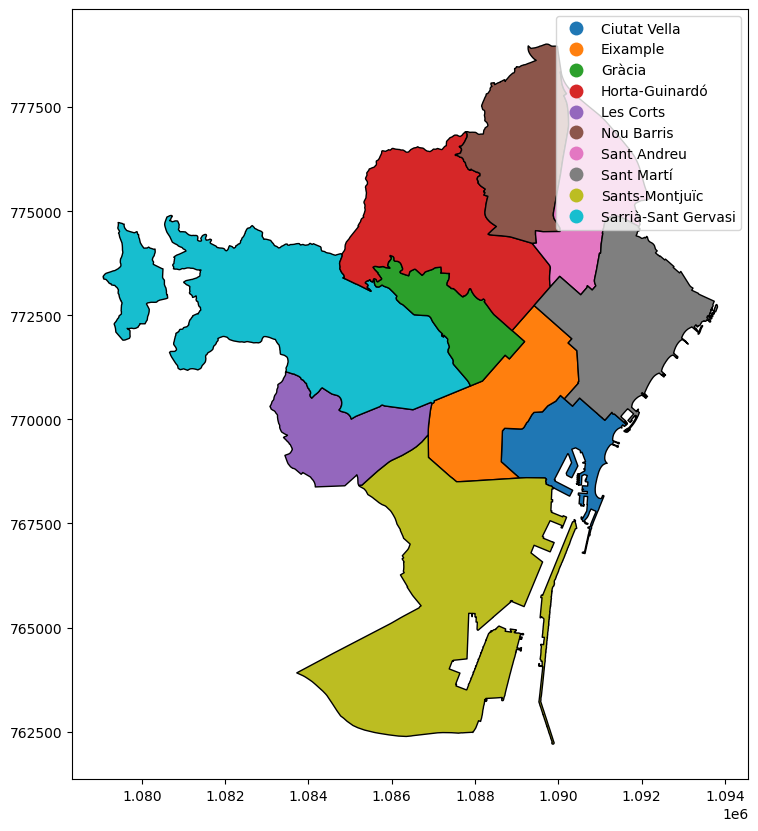

In [ ]:
# Mapa por distritos de Barcelona
districts.plot(column='NOM', figsize=(10,10), edgecolor='black', legend=True)

In [32]:
import plotly.express as px
import geopandas as gpd

# Cargar el archivo GeoDataFrame con información de los distritos
districts = gpd.read_file('C:/Users/TITAN OSCURO/Desktop/UB captson project/UB-capston-project/UB-capston-project/districtes.geojson')  # Reemplaza con la ruta de tu archivo GeoJSON

# Convertir el GeoDataFrame a un formato que Plotly pueda usar
districts['geometry'] = districts['geometry'].apply(lambda x: x.simplify(0.01))
districts = districts.to_crs('EPSG:4326')  # Asegúrate de usar el sistema de coordenadas WGS84 (EPSG:4326)

# Crear el mapa interactivo
fig = px.choropleth_mapbox(
    districts,
    geojson=districts.geometry,
    locations=districts.index,
    color='NOM',  # Usa 'NOM' como columna para la categorización
    mapbox_style="carto-positron",
    center={"lat": 41.3851, "lon": 2.1734},  # Coordenadas de Barcelona
    zoom=10,
    title="Distritos de Barcelona"
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()  

C:\Users\TITAN OSCURO\AppData\Local\Temp\ipykernel_22280\2375452328.py:12: DeprecationWarning: *choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.choropleth_mapbox(
